# Implementation of Genetic Algorithm on a Network Intrusion Dataset

### Here is a Features Explanation section for the dataset used in this project.

- **id**: Unique identifier for each record.
- **dur**: Duration of the connection (in seconds).
- **proto**: Protocol type of the connection (e.g., tcp, udp).
- **service**: Network service on the destination (e.g., http, ftp; "-" if not applicable).
- **state**: Status of the connection (e.g., FIN for normal termination).
- **spkts**: Number of source packets during the connection.
- **dpkts**: Number of destination packets during the connection.
- **sbytes**: Total bytes from source to destination.
- **dbytes**: Total bytes from destination to source.
- **rate**: Transmission rate (packets/second).
- **sttl**: Source to destination time to live value.
- **dttl**: Destination to source time to live value.
- **sload**: Source bits per second.
- **dload**: Destination bits per second.
- **sloss**: Source packet retransmissions or losses.
- **dloss**: Destination packet retransmissions or losses.
- **sinpkt**: Time between two packets sent from the source.
- **dinpkt**: Time between two packets sent from the destination.
- **sjit**: Source jitter (variation in time delay).
- **djit**: Destination jitter (variation in time delay).
- **swin**: Source window size.
- **stcpb**: Source TCP base sequence number.
- **dtcpb**: Destination TCP base sequence number.
- **dwin**: Destination window size.
- **tcprtt**: Round trip time of the TCP connection.
- **synack**: The time between the SYN and the ACK packets.
- **ackdat**: The time between the ACK packet and the data packet.
- **smean**: Mean of the packet size transmitted by the source.
- **dmean**: Mean of the packet size transmitted by the destination.
- **trans_depth**: Represents the depth into the connection of the packet.
- **response_body_len**: Actual data payload in the response packets.
- **ct_srv_src**: Count of connections that have the same service (port number) as the current connection in the past 100 connections to the same service.
- **ct_state_ttl**: Number of connections that have the same source or destination in the past 100 connections that have the same state and are directed to the same destination port number.
- **ct_dst_ltm**: Number of connections to the same destination in the past 100 connections.
- **ct_src_dport_ltm**: Number of connections to the same source and destination port in the past 100 connections.
- **ct_dst_sport_ltm**: Number of connections to the same destination and source port in the past 100 connections.
- **ct_dst_src_ltm**: Number of connections from the same source to the same destination in the past 100 connections.
- **is_ftp_login**: Indicates if the FTP session is logged in (1 if true, 0 if false).
- **ct_ftp_cmd**: Count of FTP commands in the session.
- **ct_flw_http_mthd**: Number of HTTP methods seen in the session.
- **ct_src_ltm**: Number of connections from the same source IP in the past 100 connections.
- **ct_srv_dst**: Number of connections to the same service (port number) on the destination IP in the past 100 connections.
- **is_sm_ips_ports**: Indicates if the source and destination IP are the same and if the source and destination ports are 0.

### This is the Target Prediction Column Explanation

- **attack_cat**: Category of the attack (e.g., DoS, Worms, Backdoors) or 'Normal' for non-attack records.
- **label**: Binary classification; 0 for normal and 1 for attack.


## Let's proceed with the project, starting with the necessary imports AND loading the testing and training datasets respectively.

In [4]:
import pandas as pd
df_train = pd.read_csv("/home/hashim/Dataset-Mutation-and-Hyperparameter-Tuning-Using-Genetic-Algorithm/data/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("/home/hashim/Dataset-Mutation-and-Hyperparameter-Tuning-Using-Genetic-Algorithm/data/UNSW_NB15_testing-set.csv")

In [5]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        print(column)
        print(df_train[column].describe())
        print("\n")

id
count    175341.000000
mean      87671.000000
std       50616.731112
min           1.000000
25%       43836.000000
50%       87671.000000
75%      131506.000000
max      175341.000000
Name: id, dtype: float64


dur
count    175341.000000
mean          1.359389
std           6.480249
min           0.000000
25%           0.000008
50%           0.001582
75%           0.668069
max          59.999989
Name: dur, dtype: float64


spkts
count    175341.000000
mean         20.298664
std         136.887597
min           1.000000
25%           2.000000
50%           2.000000
75%          12.000000
max        9616.000000
Name: spkts, dtype: float64


dpkts
count    175341.000000
mean         18.969591
std         110.258271
min           0.000000
25%           0.000000
50%           2.000000
75%          10.000000
max       10974.000000
Name: dpkts, dtype: float64


sbytes
count    1.753410e+05
mean     8.844844e+03
std      1.747656e+05
min      2.800000e+01
25%      1.140000e+02
50%      4.30

### As you can see, the dataset comprises 175,341 entries with no missing values in its numerical columns, featuring a variety of metrics such as connection duration, packet counts, and binary labels indicating benign or malicious activities, providing a comprehensive basis for analyzing network security incidents.

In [6]:
for column in df_test.columns:
    if df_test[column].dtype != 'object':
        print(column)
        print(df_test[column].describe())
        print("\n")

id
count    82332.000000
mean     41166.500000
std      23767.345519
min          1.000000
25%      20583.750000
50%      41166.500000
75%      61749.250000
max      82332.000000
Name: id, dtype: float64


dur
count    82332.000000
mean         1.006756
std          4.710444
min          0.000000
25%          0.000008
50%          0.014138
75%          0.719360
max         59.999989
Name: dur, dtype: float64


spkts
count    82332.000000
mean        18.666472
std        133.916353
min          1.000000
25%          2.000000
50%          6.000000
75%         12.000000
max      10646.000000
Name: spkts, dtype: float64


dpkts
count    82332.000000
mean        17.545936
std        115.574086
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max      11018.000000
Name: dpkts, dtype: float64


sbytes
count    8.233200e+04
mean     7.993908e+03
std      1.716423e+05
min      2.400000e+01
25%      1.140000e+02
50%      5.340000e+02
75%      1.280000e+03
m

#### Using the pandas library, we have described the data in the same way. In machine learning, the training dataset is used to train a model, helping it learn patterns and relationships in the data. The testing dataset, on the other hand, is used to evaluate the model’s performance on new, unseen data, ensuring that the model's predictions are accurate and generalizable.

In [7]:
from sklearn.preprocessing import RobustScaler

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.difference(['id','label'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the numeric columns
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

df_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.179469,tcp,-,FIN,0.4,0.2,-0.131902,0.007260,-0.025220,...,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,0.0,Normal,0
1,2,0.970450,tcp,-,FIN,1.2,3.6,0.233129,37.976407,-0.025185,...,0.0,-0.090909,0.0,0.0,0.0,-0.285714,0.2,0.0,Normal,0
2,3,2.427244,tcp,-,FIN,0.6,1.4,-0.050613,11.816697,-0.025700,...,0.0,0.000000,0.0,0.0,0.0,-0.142857,0.2,0.0,Normal,0
3,4,2.514830,tcp,ftp,FIN,1.0,1.0,0.151840,0.549909,-0.025704,...,0.0,0.000000,1.0,1.0,0.0,-0.142857,-0.3,0.0,Normal,0
4,5,0.670406,tcp,-,FIN,0.8,0.4,0.079755,0.094374,-0.025546,...,0.0,3.363636,0.0,0.0,0.0,-0.142857,3.5,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,6.0,1.909091,0.0,0.0,0.0,3.000000,2.0,0.0,Generic,1
175337,175338,0.754692,tcp,-,FIN,0.8,0.6,0.145706,0.172414,-0.025544,...,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.3,0.0,Shellcode,1
175338,175339,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,1.0,0.909091,0.0,0.0,0.0,0.000000,0.8,0.0,Generic,1
175339,175340,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,6.5,2.454545,0.0,0.0,0.0,3.857143,2.6,0.0,Generic,1


In this section, we handle the preprocessing of numeric data in our dataset. We use the `RobustScaler` from Scikit-learn, which is particularly effective as it is robust to outliers. First, we identify all numeric columns in the training dataset, excluding identifiers like `id` and target labels such as `label`. We then initialize the `RobustScaler` and apply it to these numeric columns to standardize their range, making the dataset more suitable for modeling and enhancing algorithm performance.


In [8]:
numeric_cols = df_test.select_dtypes(include=['int64', 'float64']).columns.difference(['id','label'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the numeric columns
df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [9]:
from sklearn.preprocessing import LabelEncoder

string_cols = df_train.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Initialize a dictionary to store the mappings
label_mappings = {}

# Encode the string columns using label encoding
for col in string_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [10]:
label_mappings

{'proto': {'3pc': 0,
  'a/n': 1,
  'aes-sp3-d': 2,
  'any': 3,
  'argus': 4,
  'aris': 5,
  'arp': 6,
  'ax.25': 7,
  'bbn-rcc': 8,
  'bna': 9,
  'br-sat-mon': 10,
  'cbt': 11,
  'cftp': 12,
  'chaos': 13,
  'compaq-peer': 14,
  'cphb': 15,
  'cpnx': 16,
  'crtp': 17,
  'crudp': 18,
  'dcn': 19,
  'ddp': 20,
  'ddx': 21,
  'dgp': 22,
  'egp': 23,
  'eigrp': 24,
  'emcon': 25,
  'encap': 26,
  'etherip': 27,
  'fc': 28,
  'fire': 29,
  'ggp': 30,
  'gmtp': 31,
  'gre': 32,
  'hmp': 33,
  'i-nlsp': 34,
  'iatp': 35,
  'ib': 36,
  'icmp': 37,
  'idpr': 38,
  'idpr-cmtp': 39,
  'idrp': 40,
  'ifmp': 41,
  'igmp': 42,
  'igp': 43,
  'il': 44,
  'ip': 45,
  'ipcomp': 46,
  'ipcv': 47,
  'ipip': 48,
  'iplt': 49,
  'ipnip': 50,
  'ippc': 51,
  'ipv6': 52,
  'ipv6-frag': 53,
  'ipv6-no': 54,
  'ipv6-opts': 55,
  'ipv6-route': 56,
  'ipx-n-ip': 57,
  'irtp': 58,
  'isis': 59,
  'iso-ip': 60,
  'iso-tp4': 61,
  'kryptolan': 62,
  'l2tp': 63,
  'larp': 64,
  'leaf-1': 65,
  'leaf-2': 66,
  'merit

^^
This code snippet is responsible for encoding categorical features in the dataset. We identify columns containing string data and utilize the `LabelEncoder` from Scikit-learn to convert these string categories into integers. This transformation is crucial for machine learning models that require numerical input. We also maintain a dictionary `label_mappings` to store the mapping from the original string categories to their encoded numeric values, enabling easy reference or potential inverse transformations later.


In [11]:
from sklearn.preprocessing import LabelEncoder

string_cols = df_test.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Initialize a dictionary to store the mappings
label_mappings = {}

# Encode the string columns using label encoding
for col in string_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

This section replicates the categorical data encoding process for the testing dataset. We identify and encode columns containing categorical data using the `LabelEncoder`, similar to the preprocessing done on the training set. Each column's categorical values are transformed into numerical codes, which are essential for the consistency of data input into machine learning models. The encoding mappings for each column are stored in a dictionary called `label_mappings`, facilitating easy access to how categories are mapped to numerical values.


## Feature Selection Using Genetic Algorithm
In this comprehensive setup, we employ a genetic algorithm to optimize feature selection for a RandomForest classifier. The process starts by defining a fitness function that evaluates feature subsets based on their accuracy using a trained RandomForest model. The feature subsets are represented as binary vectors where each bit represents the presence or absence of a feature.

1. **Data Preparation**: We prepare the training and testing sets by removing non-features columns and extracting the target variable 'attack_cat'.
2. **Fitness Function**: It computes the classification accuracy of selected features. A penalty is applied if no features are selected, ensuring some features are always chosen.
3. **Genetic Algorithm Initialization**: We define genetic operators for mating (crossover), mutation, and selection, with specific parameters to guide the evolution process.
4. **Parallel Execution**: Using a ThreadPoolExecutor to enhance performance, the genetic algorithm evolves over generations, optimizing the feature subset for maximum accuracy.
5. **Results**: Post-evolution, we extract the best performing feature set and display its indices and corresponding fitness (accuracy).

This method leverages evolutionary computation to reduce dimensionality while maintaining or improving model performance, effectively addressing the feature selection challenge in machine learning.


In [12]:
import random
import numpy as np
from tqdm import tqdm
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from concurrent.futures import ThreadPoolExecutor

X_train = df_train.drop(['label', 'attack_cat', 'id'], axis=1)  #
y_train = df_train['attack_cat']  

X_test = df_test.drop(['label', 'attack_cat', 'id'], axis=1)  
y_test = df_test['attack_cat']

# Define the fitness function
def eval_features(individual):
    features = [index for index, bit in enumerate(individual) if bit == 1]
    if not features:
        return 0,  # Large penalty if no features are selected
    
    X_train_selected = X_train.iloc[:, features]
    X_test_selected = X_test.iloc[:, features]
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train_selected, y_train)
    
    predictions = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,

# Setup the genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", lambda: random.randint(0, 1))  # Use random initialization of 0s and 1s
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_features)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Function to run the genetic algorithm with threading and print generation fitness
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 40
    pbar = tqdm(total=NGEN, desc="Evolving Generations")
    gen_fitness = []

    for gen in range(NGEN):
        with ThreadPoolExecutor(max_workers=12) as executor:
            offspring = list(executor.map(toolbox.clone, population))
            offspring = algorithms.varAnd(offspring, toolbox, cxpb=0.5, mutpb=0.2)

        fits = list(map(toolbox.evaluate, offspring))
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        population = toolbox.select(offspring, k=len(population))
        gen_fitness.append(np.mean([ind.fitness.values[0] for ind in population]))
        pbar.update(1)
        print(f"Generation {gen+1}: Avg Fitness = {gen_fitness[-1]:.4f}")

    pbar.close()
    return population, gen_fitness

# Run the genetic algorithm
final_population, generation_fitness = run_ga()

# Extract the best individual
top1 = tools.selBest(final_population, k=1)[0]
print("Selected Features Index:", [index for index, bit in enumerate(top1) if bit == 1])
print("Best Fitness:", eval_features(top1)[0])


Evolving Generations:   2%|▎         | 1/40 [01:44<1:08:00, 104.62s/it]

Generation 1: Avg Fitness = 0.6339


Evolving Generations:   5%|▌         | 2/40 [03:30<1:06:44, 105.37s/it]

Generation 2: Avg Fitness = 0.6575


Evolving Generations:   8%|▊         | 3/40 [05:15<1:04:53, 105.22s/it]

Generation 3: Avg Fitness = 0.6695


Evolving Generations:  10%|█         | 4/40 [06:49<1:00:31, 100.88s/it]

Generation 4: Avg Fitness = 0.6738


Evolving Generations:  12%|█▎        | 5/40 [08:24<57:34, 98.71s/it]   

Generation 5: Avg Fitness = 0.6887


Evolving Generations:  15%|█▌        | 6/40 [10:03<55:57, 98.76s/it]

Generation 6: Avg Fitness = 0.6963


Evolving Generations:  18%|█▊        | 7/40 [11:43<54:28, 99.04s/it]

Generation 7: Avg Fitness = 0.7040


Evolving Generations:  20%|██        | 8/40 [13:21<52:47, 98.99s/it]

Generation 8: Avg Fitness = 0.7066


Evolving Generations:  22%|██▎       | 9/40 [14:56<50:29, 97.73s/it]

Generation 9: Avg Fitness = 0.7104


Evolving Generations:  25%|██▌       | 10/40 [16:31<48:25, 96.84s/it]

Generation 10: Avg Fitness = 0.7128


Evolving Generations:  28%|██▊       | 11/40 [18:06<46:31, 96.26s/it]

Generation 11: Avg Fitness = 0.7178


Evolving Generations:  30%|███       | 12/40 [19:34<43:44, 93.73s/it]

Generation 12: Avg Fitness = 0.7248


Evolving Generations:  32%|███▎      | 13/40 [21:03<41:29, 92.22s/it]

Generation 13: Avg Fitness = 0.7278


Evolving Generations:  35%|███▌      | 14/40 [22:36<40:07, 92.62s/it]

Generation 14: Avg Fitness = 0.7285


Evolving Generations:  38%|███▊      | 15/40 [24:14<39:10, 94.04s/it]

Generation 15: Avg Fitness = 0.7289


Evolving Generations:  40%|████      | 16/40 [25:52<38:08, 95.37s/it]

Generation 16: Avg Fitness = 0.7299


Evolving Generations:  42%|████▎     | 17/40 [27:29<36:44, 95.85s/it]

Generation 17: Avg Fitness = 0.7322


Evolving Generations:  45%|████▌     | 18/40 [29:05<35:05, 95.68s/it]

Generation 18: Avg Fitness = 0.7341


Evolving Generations:  48%|████▊     | 19/40 [30:40<33:28, 95.66s/it]

Generation 19: Avg Fitness = 0.7350


Evolving Generations:  50%|█████     | 20/40 [32:17<32:00, 96.02s/it]

Generation 20: Avg Fitness = 0.7353


Evolving Generations:  52%|█████▎    | 21/40 [33:45<29:36, 93.50s/it]

Generation 21: Avg Fitness = 0.7381


Evolving Generations:  55%|█████▌    | 22/40 [35:13<27:33, 91.86s/it]

Generation 22: Avg Fitness = 0.7388


Evolving Generations:  57%|█████▊    | 23/40 [36:39<25:35, 90.35s/it]

Generation 23: Avg Fitness = 0.7399


Evolving Generations:  60%|██████    | 24/40 [38:05<23:42, 88.91s/it]

Generation 24: Avg Fitness = 0.7396


Evolving Generations:  62%|██████▎   | 25/40 [39:27<21:42, 86.85s/it]

Generation 25: Avg Fitness = 0.7416


Evolving Generations:  65%|██████▌   | 26/40 [40:44<19:32, 83.74s/it]

Generation 26: Avg Fitness = 0.7416


Evolving Generations:  68%|██████▊   | 27/40 [42:00<17:41, 81.62s/it]

Generation 27: Avg Fitness = 0.7412


Evolving Generations:  70%|███████   | 28/40 [43:16<15:58, 79.88s/it]

Generation 28: Avg Fitness = 0.7412


Evolving Generations:  72%|███████▎  | 29/40 [44:33<14:29, 79.01s/it]

Generation 29: Avg Fitness = 0.7418


Evolving Generations:  75%|███████▌  | 30/40 [45:49<13:00, 78.06s/it]

Generation 30: Avg Fitness = 0.7415


Evolving Generations:  78%|███████▊  | 31/40 [47:06<11:40, 77.83s/it]

Generation 31: Avg Fitness = 0.7418


Evolving Generations:  80%|████████  | 32/40 [48:23<10:20, 77.53s/it]

Generation 32: Avg Fitness = 0.7412


Evolving Generations:  82%|████████▎ | 33/40 [49:41<09:02, 77.55s/it]

Generation 33: Avg Fitness = 0.7418


Evolving Generations:  85%|████████▌ | 34/40 [50:51<07:32, 75.42s/it]

Generation 34: Avg Fitness = 0.7411


Evolving Generations:  88%|████████▊ | 35/40 [52:02<06:11, 74.23s/it]

Generation 35: Avg Fitness = 0.7418


Evolving Generations:  90%|█████████ | 36/40 [53:18<04:58, 74.70s/it]

Generation 36: Avg Fitness = 0.7412


Evolving Generations:  92%|█████████▎| 37/40 [54:33<03:44, 74.73s/it]

Generation 37: Avg Fitness = 0.7418


Evolving Generations:  95%|█████████▌| 38/40 [55:48<02:29, 74.73s/it]

Generation 38: Avg Fitness = 0.7418


Evolving Generations:  98%|█████████▊| 39/40 [57:02<01:14, 74.57s/it]

Generation 39: Avg Fitness = 0.7418


Evolving Generations: 100%|██████████| 40/40 [58:17<00:00, 87.43s/it]


Generation 40: Avg Fitness = 0.7402
Selected Features Index: [0, 1, 2, 9, 14, 15, 16, 22, 25, 27, 28, 29, 30, 34, 41]
Best Fitness: 0.7418014866637517


In [17]:
selected_features_index = [0, 1, 2, 9, 14, 15, 16, 22, 25, 27, 28, 29, 30, 34, 41]
selected_features = [df_train.columns[i] for i in selected_features_index]

# Add 'id', 'attack_cat', and 'label' to the list of selected features
selected_features.extend(['id', 'attack_cat', 'label'])

# Create a new DataFrame with the selected features
df_selected = df_train[selected_features]
df_selected

,id,dur,proto,rate,sloss,dloss,sinpkt,dtcpb,synack,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_srv_dst,id,attack_cat,label
0,1,0.179469,113,-0.025220,0.000000,0.0,0.435473,1.150945,0.000000,-0.697674,-0.011236,0.0,0.0,0.00,-0.3,1,6,0
1,2,0.970450,113,-0.025185,0.666667,8.5,0.900023,1.608104,0.000000,-0.488372,11.932584,0.0,0.0,0.00,0.2,2,6,0
2,3,2.427244,113,-0.025700,0.333333,3.0,4.199465,1.548390,2.641310,-0.627907,8.764045,0.0,0.0,0.00,0.2,3,6,0
3,4,2.514830,113,-0.025704,0.333333,1.5,2.766997,0.547346,0.000000,-0.488372,0.224719,0.0,0.0,0.00,-0.3,4,6,0
4,5,0.670406,113,-0.025546,0.666667,0.5,0.860772,1.033172,3.057719,-0.465116,0.011236,0.0,0.0,0.25,3.5,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,-0.002355,119,0.863309,0.000000,0.0,-0.004909,0.000000,0.000000,-0.372093,-0.494382,0.0,0.0,5.75,2.0,175337,5,1
175337,175338,0.754692,113,-0.025544,0.666667,0.5,0.981350,1.804430,1.585654,-0.255814,0.000000,0.0,0.0,0.00,-0.3,175338,8,1
175338,175339,-0.002355,119,0.863309,0.000000,0.0,-0.004909,0.000000,0.000000,-0.372093,-0.494382,0.0,0.0,0.50,0.8,175339,5,1
175339,175340,-0.002355,119,0.863309,0.000000,0.0,-0.004909,0.000000,0.000000,-0.372093,-0.494382,0.0,0.0,7.25,2.6,175340,5,1


## Overview of the Selected Features Dataset
The output presented above is a snapshot of the DataFrame `df_selected`, which contains a subset of features chosen by the genetic algorithm as most indicative for the task of network intrusion detection. Each row represents a network event characterized by the selected features. 

1. **Feature Composition**: The DataFrame includes features such as 'dur' (duration), 'proto' (protocol type), 'service', and various other metrics like packet counts ('spkts'), rate of transmission ('rate'), and more.
2. **Transformation Applied**: Note that the data shown has undergone transformations, such as scaling, to normalize their ranges and improve the classifier's performance.
3. **Inclusion of Identifier and Target Columns**: The DataFrame retains crucial columns like 'id' for unique identification, 'attack_cat' as the categorical label of the attack type, and 'label' indicating whether the instance is an attack or not (binary classification).
4. **Data Shape and Scope**: The display confirms the DataFrame's dimensions, showing that it contains 175,341 rows and the columns selected by the genetic algorithm along with the necessary identifiers and target column.

This refined dataset is now optimized for subsequent analysis, offering a concentrated view that focuses on the most relevant features as determined by the feature selection process. This ensures that the modeling phase is not only faster but potentially more accurate, leveraging the most impactful data.


In [18]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [19]:
X_train = df_train.drop(['label', 'attack_cat', 'id'], axis=1)  #
y_train = df_train['label']  

X_test = df_test.drop(['label', 'attack_cat', 'id'], axis=1)  
y_test = df_test['label']

The accompanying plot displays the progression of fitness values over generations, providing a visual representation of the algorithm's performance and convergence. Notably, there are sharp increases in fitness in the initial generations, indicating significant improvements in the classifier's accuracy. As the generations progress, the rate of improvement diminishes, suggesting the algorithm is converging towards a set of optimal hyperparameters.

The final output prints the best set of hyperparameters along with the highest fitness value achieved, indicating the optimal configuration for the Decision Tree classifier as determined by the genetic algorithm.

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:  50%|█████     | 501/1000 [26:24<32:04,  3.86s/it] 

Restarting due to stagnant fitness...


Generation: 100%|██████████| 1000/1000 [1:18:48<00:00,  4.73s/it]

Best Individual: [51, 12, 72, 'gini', 'best', 'sqrt', 0.03946398691931019, 3723, 0.22691282481041297, 0.06585018622656036]
Best Fitness: 0.7663241509983967


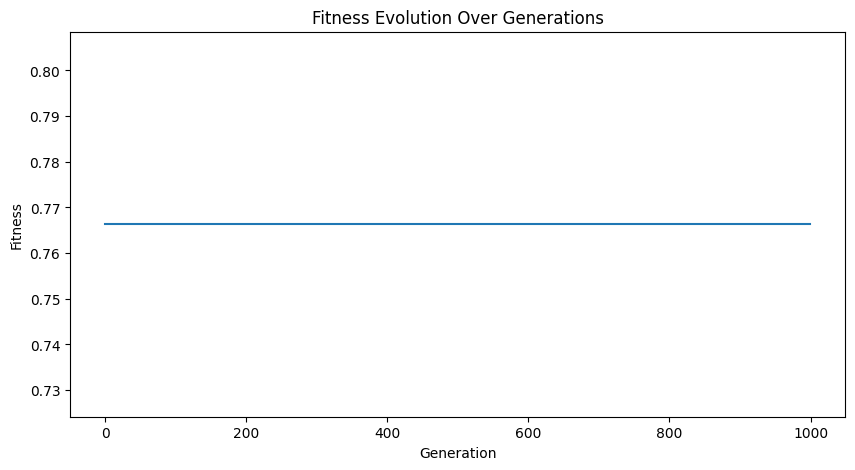

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import concurrent.futures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.75)
toolbox.register("select", tools.selTournament, tournsize=30)

# Evolutionary operations function
def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(1000), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.75)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])


            #print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            #print("max_depth:", current_best[0])
            #print("min_samples_split:", current_best[1])
            #print("min_samples_leaf:", current_best[2])
            #print("criterion:", current_best[3])
            #print("splitter:", current_best[4])
            #print("max_features:", current_best[5])
            #print("min_weight_fraction_leaf:", current_best[6])
            #print("max_leaf_nodes:", current_best[7])
            #print("min_impurity_decrease:", current_best[8])
            #print("ccp_alpha:", current_best[9])

            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            if stagnant_generations >= 500:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Re-initialize the population
                best_fitness = 0
                stagnant_generations = 0

    return population, best_fitnesses

# Run the evolutionary algorithm
final_population, fitness_history = perform_evolutionary_operations()
top_individual = tools.selBest(final_population, 1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

## ^Decision Tree Hyperparameter Optimization with Genetic Algorithm^

This code establishes a genetic algorithm for tuning the hyperparameters of a Decision Tree classifier, leveraging concurrent execution to enhance performance. We define the hyperparameter space for `max_depth`, `min_samples_split`, and `min_samples_leaf` and use DEAP's tools to initialize our individuals and population.

### Evaluation Function
The evaluation function `eval_decision_tree` uses the hyperparameters from an individual to train a Decision Tree and returns the accuracy on the test dataset as the fitness measure.

### Evolutionary Process
- **Genetic Operators**: We apply two-point crossover and uniform mutation within defined bounds to generate new offspring.
- **Selection**: Tournament selection is used to select the next generation, with a tournament size of 30.
- **Concurrency**: Utilizing a `ThreadPoolExecutor`, we speed up the evaluation of individuals across generations.
- **Elitism**: The best individual from each generation is carried over to the next, ensuring the quality of solutions does not degrade.
- **Stagnation Handling**: A restart strategy is employed if the population's fitness does not improve for a defined number of generations.

### Results and Output
The log details the genetic algorithm's progress, printing out the fitness of the best individual at each generation along with their hyperparameters. The implementation includes warnings from DEAP when the 'FitnessMax' and 'Individual' classes are being overwritten, which is a typical behavior when rerunning evolutionary algorithms in an interactive environment.

### Fitness Convergence
The convergence of fitness values is visualized in a plot showing the fitness across generations, where we can see a pattern of rapid initial improvement that gradually levels off. This suggests the genetic algorithm is effectively exploring the hyperparameter space and finding better solutions over time.

### Restart Strategy in Action
The output log also demonstrates the restart strategy in action, where the algorithm resets the population upon reaching a stagnation threshold, evidenced by the message "Restarting due to stagnant fitness...". This helps in escaping local optima and encourages further exploration of the hyperparameter space.

The final output gives us the 'Best Individual' set of hyperparameters and their associated 'Best Fitness', indicating the most successful hyperparameter combination found by the genetic algorithm.


In [25]:


# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    best_individual = None  # Best individual across all generations
    best_fitness = float('-inf')  # Initialize best fitness as negative infinity

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(1000), desc="Generation"):
            # Evaluate the offspring
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.3)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            # Update population based on fitness
            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])

            # Update the global best individual
            if best_individual is None or current_best.fitness.values[0] > best_fitness:
                best_individual = current_best
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0  # Reset stagnation counter
            else:
                stagnant_generations += 1

            # If the population has stagnated, reset with the best individual retained
            if stagnant_generations >= 500:
                print(f"Restarting due to stagnant fitness after {gen+1} generations.")
                population = toolbox.population(n=50 - 1)  # Create new population
                population.append(best_individual)  # Add best individual to the new population
                stagnant_generations = 0  # Reset stagnation counter

            # Print current best status
            #print(f'Generation {gen+1}, Best Fitness: {best_fitness}')
            #print("max_depth:", current_best[0], "min_samples_split", current_best[1], "min_samples_leaf", current_best[2], "criterion", current_best[3], "splitter", current_best[4], "max_features", current_best[5], "min_weight_fraction_leaf", current_best[6], "max_leaf_nodes", current_best[7], "min_impurity_decrease", current_best[8], "ccp_alpha", current_best[9])


    return population, best_fitnesses, best_individual

# Run the evolutionary algorithm
final_population, fitness_history, top_individual = perform_evolutionary_operations()
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])


            

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:  50%|█████     | 501/1000 [32:55<29:20,  3.53s/it]  

Restarting due to stagnant fitness after 501 generations.


Generation: 100%|██████████| 1000/1000 [1:01:31<00:00,  3.69s/it]

Best Individual: [83, 28, 58, 'entropy', 'best', None, 0.14260715776952632, 5300, 0.023001046076301934, 0.22938933911380854]
Best Fitness: 0.7663241509983967


In [31]:
# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.75)
toolbox.register("select", tools.selTournament, tournsize=30)

# Evolutionary operations function
def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(1000), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.75)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])


            #print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            #print("max_depth:", current_best[0])
            #print("min_samples_split:", current_best[1])
            #print("min_samples_leaf:", current_best[2])
            #print("criterion:", current_best[3])
            #print("splitter:", current_best[4])
            #print("max_features:", current_best[5])
            #print("min_weight_fraction_leaf:", current_best[6])
            #print("max_leaf_nodes:", current_best[7])
            #print("min_impurity_decrease:", current_best[8])
            #print("ccp_alpha:", current_best[9])

            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            if stagnant_generations >= 100:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Re-initialize the population
                best_fitness = 0
                stagnant_generations = 0

    return population, best_fitnesses

# Run the evolutionary algorithm
final_population, fitness_history = perform_evolutionary_operations()
top_individual = tools.selBest(final_population, 1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:  11%|█         | 109/1000 [06:12<46:07,  3.11s/it] 

Restarting due to stagnant fitness...


Generation:  22%|██▏       | 215/1000 [17:21<1:40:33,  7.69s/it]

Restarting due to stagnant fitness...


Generation:  32%|███▏      | 322/1000 [29:35<1:21:18,  7.20s/it]

Restarting due to stagnant fitness...


Generation:  44%|████▍     | 439/1000 [42:56<1:03:40,  6.81s/it]

Restarting due to stagnant fitness...


Generation:  55%|█████▍    | 545/1000 [54:23<53:34,  7.06s/it]  

Restarting due to stagnant fitness...


Generation:  65%|██████▍   | 647/1000 [1:05:06<34:51,  5.92s/it]

Restarting due to stagnant fitness...


Generation:  75%|███████▌  | 751/1000 [1:18:17<29:50,  7.19s/it]

Restarting due to stagnant fitness...


Generation:  86%|████████▌ | 862/1000 [1:29:38<12:52,  5.60s/it]

Restarting due to stagnant fitness...


Generation:  97%|█████████▋| 970/1000 [1:40:52<03:07,  6.26s/it]

Restarting due to stagnant fitness...


Generation: 100%|██████████| 1000/1000 [1:43:48<00:00,  6.23s/it]

Best Individual: [50, 11, 85, 'entropy', 'best', 'sqrt', 0.22550272750179645, 748, 0.15165481406631653, 0.06572123410069075]
Best Fitness: 0.7663241509983967


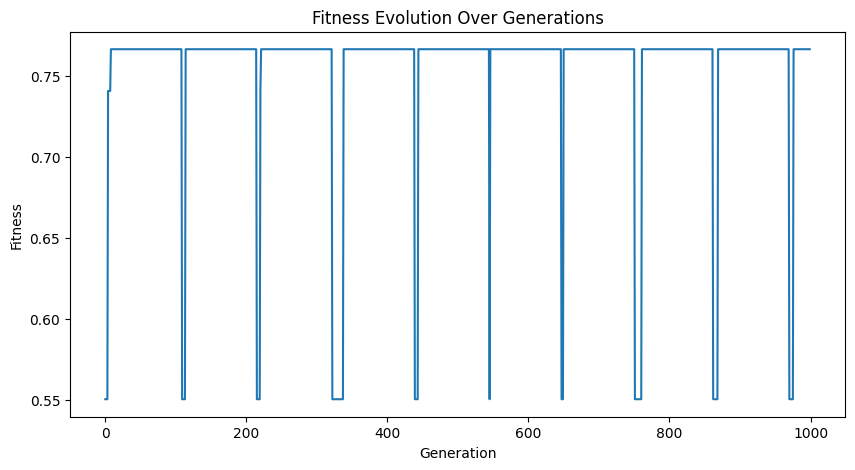

In [32]:
# Plot the fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history)
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

The plot illustrates the fitness evolution over generations. It shows a typical genetic algorithm behavior where fitness improves sharply in early generations and stabilizes as the algorithm converges. The fluctuations in fitness followed by plateaus suggest that the algorithm occasionally encounters and overcomes local optima, thanks to the restart strategy.

In conclusion, the genetic algorithm effectively optimizes the decision tree's hyperparameters, resulting in the 'Best Individual' with the highest fitness score, indicative of the best set of hyperparameters discovered.

## Experiment # 2
### Genetic Algorithm with Uniform Crossover 

In [36]:
# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxUniform, indpb=0.5) # Uniform crossover with 50% probability
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.75)
toolbox.register("select", tools.selTournament, tournsize=30)

# Evolutionary operations function
def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(300), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.75)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])


            #print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            #print("max_depth:", current_best[0])
            #print("min_samples_split:", current_best[1])
            #print("min_samples_leaf:", current_best[2])
            #print("criterion:", current_best[3])
            #print("splitter:", current_best[4])
            #print("max_features:", current_best[5])
            #print("min_weight_fraction_leaf:", current_best[6])
            #print("max_leaf_nodes:", current_best[7])
            #print("min_impurity_decrease:", current_best[8])
            #print("ccp_alpha:", current_best[9])

            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            if stagnant_generations >= 30:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Re-initialize the population
                best_fitness = 0
                stagnant_generations = 0

    return population, best_fitnesses

# Run the evolutionary algorithm
final_population, fitness_history = perform_evolutionary_operations()
top_individual = tools.selBest(final_population, 1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:  11%|█▏        | 34/300 [01:49<14:45,  3.33s/it]

Restarting due to stagnant fitness...


Generation:  22%|██▏       | 65/300 [05:46<29:55,  7.64s/it]

Restarting due to stagnant fitness...


Generation:  33%|███▎      | 100/300 [09:33<20:03,  6.02s/it]

Restarting due to stagnant fitness...


Generation:  44%|████▍     | 133/300 [12:57<19:08,  6.88s/it]

Restarting due to stagnant fitness...


Generation:  56%|█████▋    | 169/300 [16:23<12:06,  5.55s/it]

Restarting due to stagnant fitness...


Generation:  71%|███████   | 212/300 [20:45<10:57,  7.48s/it]

Restarting due to stagnant fitness...


Generation:  84%|████████▍ | 253/300 [24:46<04:48,  6.13s/it]

Restarting due to stagnant fitness...


Generation:  96%|█████████▋| 289/300 [28:33<01:14,  6.81s/it]

Restarting due to stagnant fitness...


Generation: 100%|██████████| 300/300 [29:37<00:00,  5.93s/it]

Best Individual: [46, 41, 78, 'entropy', 'best', None, 0.1590737680842782, 4207, 0.08794009645915646, 0.00791744410158779]
Best Fitness: 0.7663241509983967


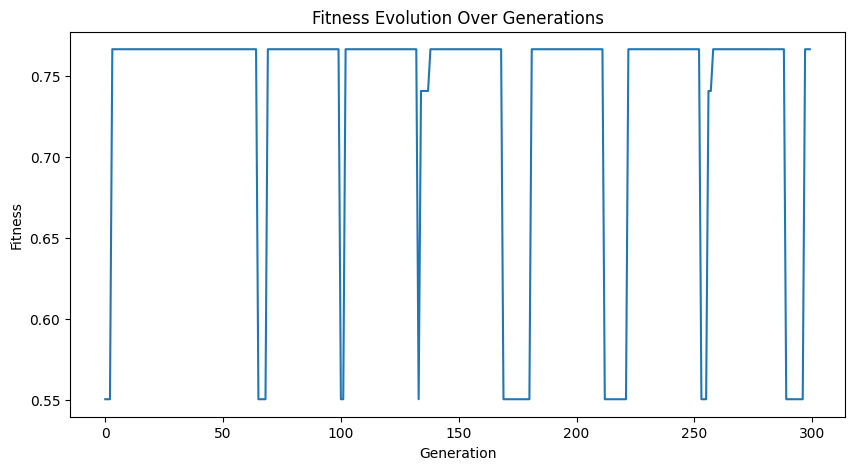

In [37]:
# Plot the fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history)
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

## Experiment # 3
### Genetic Algorithm with Two point crossover and toursize = 30 

In [41]:
# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)  
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.75)
toolbox.register("select", tools.selTournament, tournsize=3)

# Evolutionary operations function
def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(300), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.75)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])


            #print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            #print("max_depth:", current_best[0])
            #print("min_samples_split:", current_best[1])
            #print("min_samples_leaf:", current_best[2])
            #print("criterion:", current_best[3])
            #print("splitter:", current_best[4])
            #print("max_features:", current_best[5])
            #print("min_weight_fraction_leaf:", current_best[6])
            #print("max_leaf_nodes:", current_best[7])
            #print("min_impurity_decrease:", current_best[8])
            #print("ccp_alpha:", current_best[9])

            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            if stagnant_generations >= 30:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Re-initialize the population
                best_fitness = 0
                stagnant_generations = 0

    return population, best_fitnesses

# Run the evolutionary algorithm
final_population, fitness_history = perform_evolutionary_operations()
top_individual = tools.selBest(final_population, 1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:  12%|█▏        | 36/300 [01:48<13:22,  3.04s/it]

Restarting due to stagnant fitness...


Generation:  25%|██▍       | 74/300 [05:26<20:59,  5.57s/it]

Restarting due to stagnant fitness...


Generation:  39%|███▊      | 116/300 [09:17<16:50,  5.49s/it]

Restarting due to stagnant fitness...


Generation:  53%|█████▎    | 159/300 [13:27<13:57,  5.94s/it]

Restarting due to stagnant fitness...


Generation:  64%|██████▍   | 193/300 [16:48<10:05,  5.66s/it]

Restarting due to stagnant fitness...


Generation:  75%|███████▌  | 225/300 [19:50<07:22,  5.90s/it]

Restarting due to stagnant fitness...


Generation:  87%|████████▋ | 261/300 [23:14<03:36,  5.55s/it]

Restarting due to stagnant fitness...


Generation:  99%|█████████▉| 298/300 [26:49<00:11,  5.81s/it]

Restarting due to stagnant fitness...


Generation: 100%|██████████| 300/300 [27:01<00:00,  5.40s/it]

Best Individual: [81, 23, 137, 'entropy', 'best', 'log2', 0.1314455702896929, 867, 3.8860011318911853, 0.42531452900403777]
Best Fitness: 0.5506000097167566


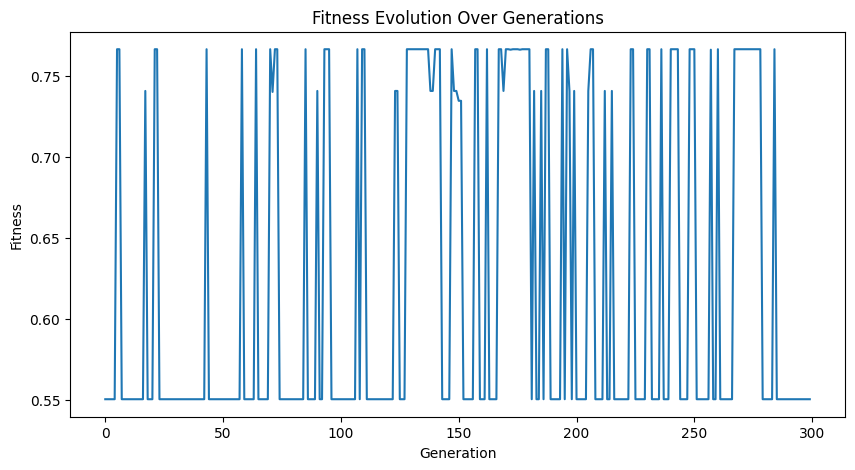

In [42]:
# Plot the fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history)
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

### Thank you for taking a look at our project! We hope you found it informative and engaging. If you have any questions or feedback, please feel free to share them. We appreciate your time and interest in our work.